In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import math
from scipy.special import factorial

In [2]:
ctx = straxbra.XebraContext()
run = '00178'
peaks_data_xebra = ctx.get_array(run, 'peaks')
waveform = peaks_data_xebra['data']
width_decile = -peaks_data_xebra['area_decile_from_midpoint'][:,1]
integral = peaks_data_xebra['area']
width = peaks_data_xebra['width'][:,5]
area_per_channel = peaks_data_xebra['area_per_channel']
timestamp = peaks_data_xebra['time']

In [3]:
def CutCondition(integral, width_decile, width, i):


    if integral[i] > 1000 and integral[i] < 5000 and width[i] > 10 and width[i] < 50:
        return(True)
    else:
        return(False)

In [4]:
def PrintWaveform(waveform,i):
    
    fig, ax1 = plt.subplots(sharex=False, figsize=(12, 3.5))
    ax1.plot(waveform[i])
    plt.show()

In [5]:
def Process(waveform, i):
    
    
    SelectionCutFlag = CutCondition(integral, width_decile, width, i)
    if SelectionCutFlag == True:
        #PrintWaveform(waveform,i)
        cut_integral.append(integral[i])
        cut_width.append(width[i])


    return()

In [6]:
cut_integral = []
cut_width = []

for i in range(0,len(waveform)):
    
    Process(waveform,i)

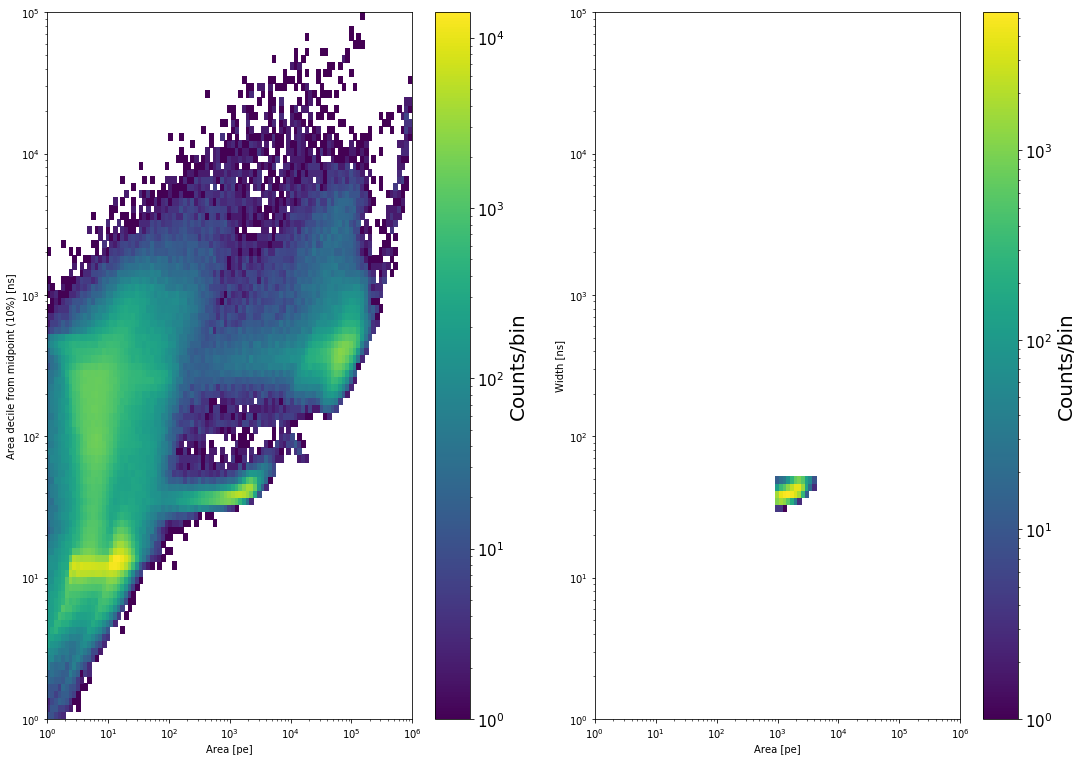

1237100
46873


In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,13))

bins_x = np.logspace(0,6,100)
bins_y = np.logspace(0,5,100)
histo_max= 2*10**3


SIZE = 20
EXTRA_SIZE = 30

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)

counts1, _, _ = np.histogram2d(integral, width, bins=(bins_x, bins_y))
counts2, _, _ = np.histogram2d(cut_integral, cut_width, bins=(bins_x, bins_y))
im1 = ax1.pcolormesh(bins_x, bins_y, counts1.T, norm=LogNorm())
cb1 = plt.colorbar(im1, ax=ax1, label='Counts/bin')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Area [pe]')
ax1.set_ylabel('Area decile from midpoint (10%) [ns]')

#ax1.plot(pS2['area'][[0,1,1,0,0]],pS2['rt'][[0,0,1,1,0]], c='r')
im2 = ax2.pcolormesh(bins_x, bins_y, counts2.T, norm=LogNorm())
cb2 = plt.colorbar(im2, ax=ax2, label='Counts/bin')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Area [pe]')
ax2.set_ylabel('Width [ns]')

plt.show()
print(len(waveform))
print(len(cut_integral))

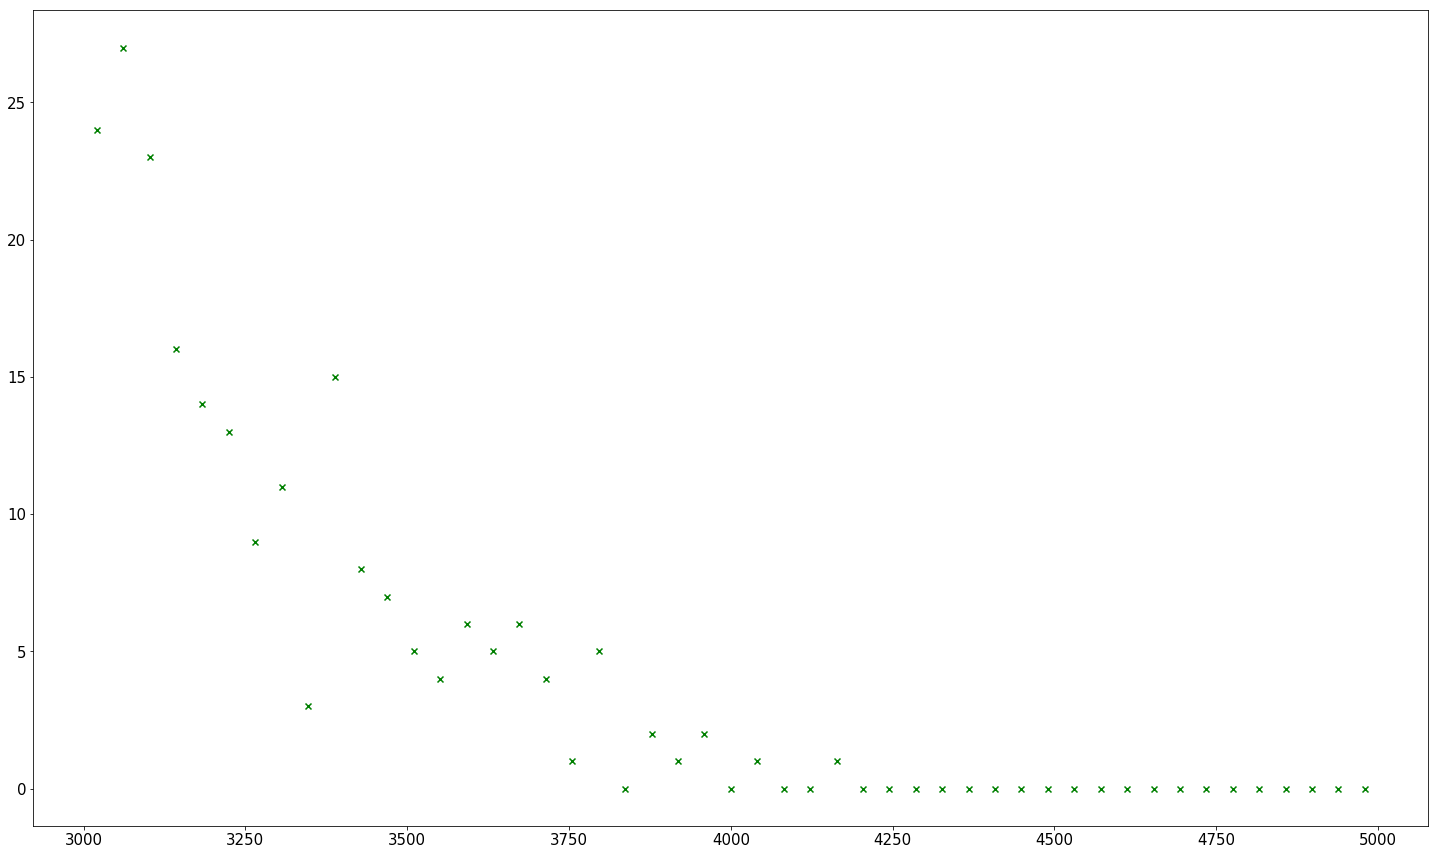

In [8]:
fig, ax = plt.subplots(figsize=(25,15))

Cs137_range = np.linspace(3000, 5000,50)
Cs137_counts, Cs137_binEdges = np.histogram(cut_integral, bins=Cs137_range)
Cs137_bincenters = 0.5 * (Cs137_binEdges[1:] + Cs137_binEdges[:-1])

ax.scatter(Cs137_bincenters, Cs137_counts ,c = 'g', marker = 'x')
plt.show()

In [9]:
p_cs = straxbra.XebraContext().get_array('00179', 'peaks')
p_bk = straxbra.XebraContext().get_array('00180', 'peaks')

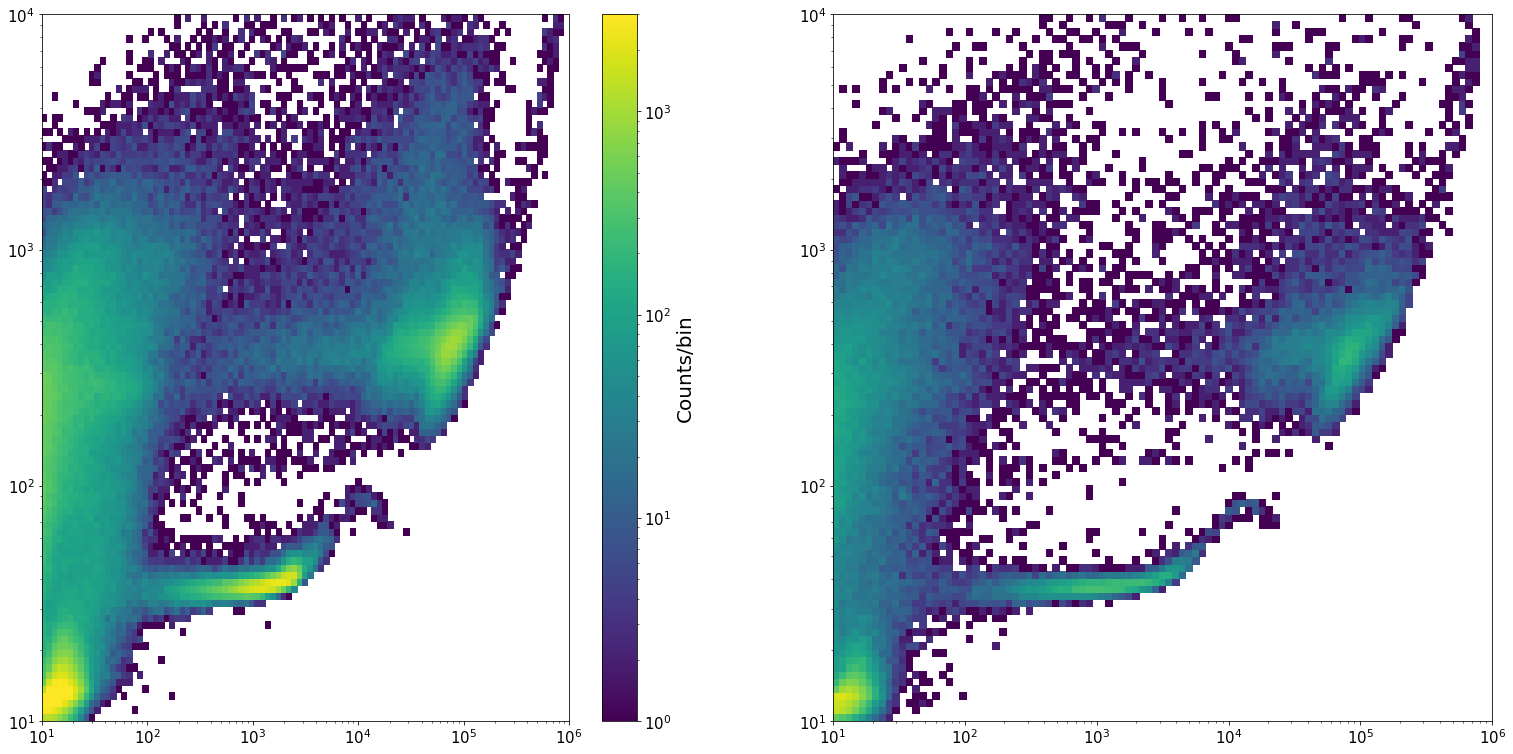

In [10]:
fig, axs = plt.subplots(figsize=(26,13), ncols=2)

bins_x = np.logspace(1, 6, 100)
bins_y = np.logspace(1, 4, 100)

counts_cs, _, _ = np.histogram2d(p_cs['area'], p_cs['width'][:,5], bins=(bins_x, bins_y))
counts_bk, _, _ = np.histogram2d(p_bk['area'], p_bk['width'][:,5], bins=(bins_x, bins_y))

im = axs[0].pcolormesh(bins_x, bins_y, counts_cs.T, norm=mpl.colors.LogNorm(), vmax=3e3)
im = axs[1].pcolormesh(bins_x, bins_y, counts_bk.T, norm=mpl.colors.LogNorm(), vmax=3e3)

plt.colorbar(im, ax=axs[0],label='Counts/bin')
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].set_yscale('log')
axs[1].set_xscale('log')


plt.show()

[  100.           104.76157528   109.74987655   114.97569954
   120.45035403   126.18568831   132.19411485   138.48863714
   145.08287785   151.9911083    159.22827933   166.81005372
   174.75284      183.07382803   191.79102617   200.92330026
   210.49041445   220.51307399   231.01297001   242.01282648
   253.5364494    265.60877829   278.25594022   291.50530628
   305.38555088   319.92671378   335.16026509   351.11917342
   367.83797718   385.35285937   403.70172586   422.92428744
   443.06214576   464.15888336   486.26015801   509.41380148
   533.66992312   559.08101825   585.70208181   613.59072734
   642.80731173   673.41506578   705.48023107   739.07220335
   774.26368268   811.13083079   849.75343591   890.21508545
   932.60334688   977.0099573   1023.5310219   1072.26722201
  1123.32403298  1176.81195243  1232.84673944  1291.54966501
  1353.04777458  1417.47416293  1484.96826225  1555.67614393
  1629.75083462  1707.35264747  1788.64952906  1873.81742286
  1963.04065004  2056.51

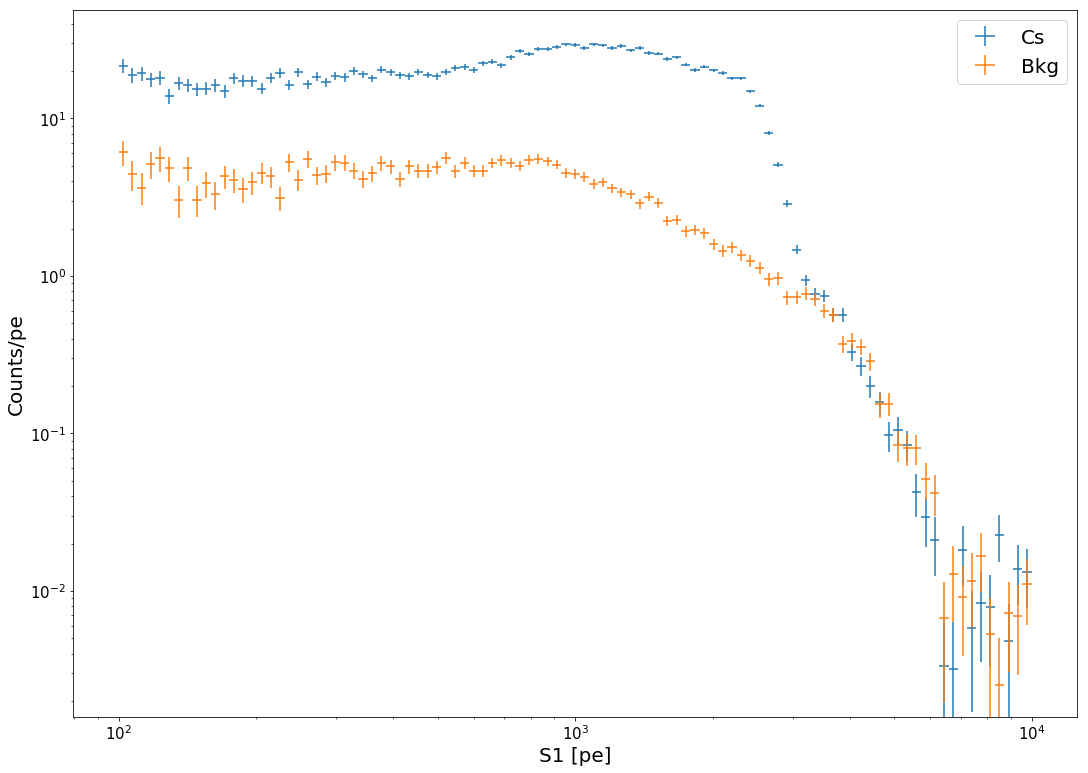

In [12]:
fig = plt.figure(figsize=(18,13))

p_cs_s1 = p_cs[(p_cs['width'][:,5] < 100) & (100 < p_cs['area']) & (p_cs['area'] < 1e4)]
p_bk_s1 = p_bk[(p_bk['width'][:,5] < 100) & (100 < p_bk['area']) & (p_bk['area'] < 1e4)]

bins = np.logspace(2,4,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])
print(bins)
print(bin_centers)
print(bin_fullwidths)
n, _ = np.histogram(p_cs_s1['area'], bins=bins)
plt.errorbar(bin_centers, n/bin_fullwidths, xerr=0.5*bin_fullwidths, yerr=np.sqrt(n)/bin_fullwidths, capsize=0, linestyle='', label='Cs')

n, _ = np.histogram(p_bk_s1['area'], bins=bins)
plt.errorbar(bin_centers, n/bin_fullwidths, xerr=0.5*bin_fullwidths, yerr=np.sqrt(n)/bin_fullwidths, capsize=0, linestyle='', label='Bkg')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Counts/pe')
plt.xlabel('S1 [pe]')
plt.legend()
plt.show()